In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [3]:
#Read the data in pandas
inp0= pd.read_csv("dataset/Attribute+DataSet.csv")
inp1= pd.read_csv("dataset/Dress+Sales.csv ")

In [3]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [4]:
inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
Dress_ID          479 non-null int64
Style             479 non-null object
Price             477 non-null object
Rating            479 non-null float64
Size              479 non-null object
Season            477 non-null object
NeckLine          476 non-null object
SleeveLength      477 non-null object
Material          360 non-null object
FabricType        223 non-null object
Decoration        255 non-null object
Pattern Type      377 non-null object
Recommendation    479 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 48.7+ KB


In [6]:
inp0.Recommendation.value_counts()

0    274
1    205
Name: Recommendation, dtype: int64

There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


In [7]:
inp0.NeckLine.value_counts()

o-neck             257
v-neck             119
slash-neck          25
boat-neck           18
Sweetheart          14
turndowncollor      13
bowneck             10
sqare-collor         5
peterpan-collor      5
open                 3
Scoop                2
halter               1
sweetheart           1
ruffled              1
backless             1
mandarin-collor      1
Name: NeckLine, dtype: int64

Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [8]:
# Print the information about the attributes of inp0 and inp1.


### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [9]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
inp0.Size=inp0.Size.apply(lambda x : 'Small' if x in ['S','s','small'] else ('Medium' if x=='M'  else ('Large' if x=='L'  else ('Extra large' if x=='XL' else 'Free'))))

In [10]:
# Print the value counts of each category in "Size" column.
inp0.Size.value_counts()['Medium']/inp0.Size.value_counts().sum()

0.3569937369519833

In [11]:
inp0.Size.value_counts()['Small']/inp0.Size.value_counts().sum()

0.07515657620041753

### Impute/Remove Missing values

In [12]:
# Print the null count of each variables of inp0 and inp1.
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

In [13]:
inp1.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [14]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
Dress_ID      479 non-null float64
29-08-2013    479 non-null int64
31-08-2013    479 non-null int64
09-02-2013    479 non-null int64
09-04-2013    479 non-null int64
09-06-2013    479 non-null int64
09-08-2013    479 non-null int64
09-10-2013    479 non-null int64
09-12-2013    479 non-null object
14-09-2013    479 non-null object
16-09-2013    479 non-null object
18-09-2013    479 non-null object
20-09-2013    479 non-null object
22-09-2013    479 non-null object
24-09-2013    479 non-null int64
26-09-2013    257 non-null float64
28-09-2013    479 non-null int64
30-09-2013    222 non-null float64
10-02-2013    220 non-null float64
10-04-2013    221 non-null float64
10-06-2013    479 non-null int64
10-08-2013    224 non-null float64
10-10-2013    224 non-null float64
10-12-2013    479 non-null int64
dtypes: float64(7), int64(11), object(6)
memory usage: 89.9+ KB


In [15]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
inp2=inp1.copy()
for i in range(8,14):
    inp2.iloc[:,i]=inp1.iloc[:,i].apply(lambda x : np.NaN if x in ['Removed','removed','Orders'] else x)

In [16]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
inp2.iloc[:,8:14]=inp2.iloc[:,8:14].astype('float')
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
Dress_ID      479 non-null float64
29-08-2013    479 non-null int64
31-08-2013    479 non-null int64
09-02-2013    479 non-null int64
09-04-2013    479 non-null int64
09-06-2013    479 non-null int64
09-08-2013    479 non-null int64
09-10-2013    479 non-null int64
09-12-2013    478 non-null float64
14-09-2013    478 non-null float64
16-09-2013    478 non-null float64
18-09-2013    478 non-null float64
20-09-2013    478 non-null float64
22-09-2013    478 non-null float64
24-09-2013    479 non-null int64
26-09-2013    257 non-null float64
28-09-2013    479 non-null int64
30-09-2013    222 non-null float64
10-02-2013    220 non-null float64
10-04-2013    221 non-null float64
10-06-2013    479 non-null int64
10-08-2013    224 non-null float64
10-10-2013    224 non-null float64
10-12-2013    479 non-null int64
dtypes: float64(13), int64(11)
memory usage: 89.9 KB


In [17]:
# Convert the object type columns in "Dress Sales" into float type of data type.
inp2.isnull().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      1
14-09-2013      1
16-09-2013      1
18-09-2013      1
20-09-2013      1
22-09-2013      1
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [18]:
# Print the null percetange of each column of inp1.
for i in inp2.isnull().sum():
    print(i*100//inp2.shape[0],end=' ')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 46 0 53 54 53 0 53 53 0 

In [19]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.

inp2.drop(['26-09-2013','30-09-2013','10-02-2013','10-04-2013','10-08-2013','10-10-2013'],axis=1,inplace=True)
inp2.isnull().sum()

Dress_ID      0
29-08-2013    0
31-08-2013    0
09-02-2013    0
09-04-2013    0
09-06-2013    0
09-08-2013    0
09-10-2013    0
09-12-2013    1
14-09-2013    1
16-09-2013    1
18-09-2013    1
20-09-2013    1
22-09-2013    1
24-09-2013    0
28-09-2013    0
10-06-2013    0
10-12-2013    0
dtype: int64

In [20]:
def customKey(item):
    return item[3:5]
sorted(inp2.columns,key=customKey)

['09-02-2013',
 '09-04-2013',
 '09-06-2013',
 '10-06-2013',
 '29-08-2013',
 '31-08-2013',
 '09-08-2013',
 '14-09-2013',
 '16-09-2013',
 '18-09-2013',
 '20-09-2013',
 '22-09-2013',
 '24-09-2013',
 '28-09-2013',
 '09-10-2013',
 '09-12-2013',
 '10-12-2013',
 'Dress_ID']

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [21]:
# Create the four seasons columns in inp1, according to the above criteria.
inp2['Summer']=inp2['29-08-2013']+inp2['31-08-2013']+inp2['09-06-2013']+inp2['09-08-2013']+inp2['10-06-2013']
inp2['Autumn']=inp2['14-09-2013']+inp2['16-09-2013']+inp2['18-09-2013']+inp2['20-09-2013']+inp2['22-09-2013']+inp2['24-09-2013']+inp2['28-09-2013']+inp2['09-10-2013']
inp2['Winter']=inp2['09-02-2013']+inp2['10-12-2013']+inp2['09-12-2013']
inp2['Spring']=inp2['09-04-2013']
inp2.columns

Index(['Dress_ID', '29-08-2013', '31-08-2013', '09-02-2013', '09-04-2013',
       '09-06-2013', '09-08-2013', '09-10-2013', '09-12-2013', '14-09-2013',
       '16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013',
       '28-09-2013', '10-06-2013', '10-12-2013', 'Summer', 'Autumn', 'Winter',
       'Spring'],
      dtype='object')

In [22]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp2.loc[:,['Summer','Autumn','Winter','Spring']].sum()

Summer     691907.0
Autumn    1353543.0
Winter     473640.0
Spring     143600.0
dtype: float64

In [23]:
inp2.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [24]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp2, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [25]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.

In [26]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
l1=[]
l1=inp0.isnull().sum()[(inp0.isnull().sum()<4)&(inp0.isnull().sum()>0)].index
l1

Index(['Price', 'Season', 'NeckLine', 'SleeveLength', 'Autumn', 'Winter'], dtype='object')

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [27]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
for i in l1:
    inp0=inp0[~inp0.loc[:,i].isnull()]
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               0
Rating              0
Size                0
Season              0
NeckLine            0
SleeveLength        0
Material          116
FabricType        250
Decoration        220
Pattern Type       98
Recommendation      0
Summer              0
Autumn              0
Winter              0
Spring              0
dtype: int64

In [28]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.fillna('Missing',inplace=True)
inp0.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Summer            0
Autumn            0
Winter            0
Spring            0
dtype: int64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [29]:
#correcting the spellings.
print(inp0.Season.value_counts())
print(inp0.SleeveLength.value_counts())

Summer    151
Spring    116
Winter     92
Automn     59
winter     44
Autumn      7
spring      2
Name: Season, dtype: int64
sleevless         213
short              92
full               91
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
cap-sleeves         2
sleeevless          2
Petal               1
sleveless           1
urndowncollor       1
half                1
turndowncollor      1
threequater         1
butterfly           1
Name: SleeveLength, dtype: int64


In [30]:
#correcting the Spellings.
inp0.Season=inp0.Season.apply(lambda x : x[0].upper()+x[1:])
inp0.Season=inp0.Season.apply(lambda x : 'Autumn' if x=='Automn' else x)
inp0.Season.value_counts()

Summer    151
Winter    136
Spring    118
Autumn     66
Name: Season, dtype: int64

In [31]:
inp0.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")

inp0.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")

inp0.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")
inp0.SleeveLength.value_counts()

sleeve less         220
short                92
full sleeves         91
half sleeves         33
three quater         26
cap sleeves           5
turn down collar      2
Petal                 1
butterfly             1
Name: SleeveLength, dtype: int64

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [32]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
inp0['Total_Sales']=inp0.Summer+inp0.Winter+inp0.Spring+inp0.Autumn
inp0.head()


,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,Total_Sales
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899,26857.0,9658.0,2660,53074.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216,17311.0,6405.0,750,30682.0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40,82.0,28.0,7,157.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455,28091.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396,29456.0


In [33]:
x=inp0.groupby('Style').sum()['Total_Sales']
m=list(x[inp0.groupby('Style').sum()['Total_Sales']<50000].index)
x[x<50000]

Style
Flare       2089.0
Novelty    13286.0
OL           289.0
fashion      395.0
Name: Total_Sales, dtype: float64

##### What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [34]:
total_collection=inp0.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()
total_collection.sum(axis = 1)
total_collection[total_collection.sum(axis= 1)<50000]
inp0.replace(total_collection[total_collection.sum(axis=1)<50000].index, 'Others', inplace=True)
inp0.Style.value_counts()


Casual      217
Sexy         65
party        48
cute         43
vintage      25
bohemian     23
work         17
Brief        17
Others       10
sexy          6
Name: Style, dtype: int64

In [35]:
# Calculate the percentage of each categories in the "Style" variable.
43*100/471

9.129511677282379

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [36]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
x=inp0.groupby('NeckLine').sum()['Total_Sales']
y=list(x[x<50000].index)
inp0.NeckLine=inp0.NeckLine.apply(lambda x: 'Others' if x in y else x)
inp0.NeckLine.value_counts()

o-neck            255
v-neck            117
Others             42
slash-neck         25
boat-neck          18
turndowncollor     13
ruffled             1
Name: NeckLine, dtype: int64

In [37]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
x=inp0.groupby('SleeveLength').sum()['Total_Sales']
y=list(x[x<50000].index)
inp0.SleeveLength=inp0.SleeveLength.apply(lambda x: 'Others' if x in y else x)
inp0.SleeveLength.value_counts()

sleeve less     220
short            92
full sleeves     91
half sleeves     33
three quater     26
Others            9
Name: SleeveLength, dtype: int64

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [38]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
x=inp0.groupby('Material').sum()['Total_Sales']
y=list(x[x<25000].index)
inp0.Material=inp0.Material.apply(lambda x: 'Others' if x in y else x)
inp0.Material.value_counts()

cotton           144
Missing          116
polyster          92
Others            29
silk              26
chiffonfabric     24
mix               12
nylon             10
rayon             10
milksilk           5
microfiber         3
Name: Material, dtype: int64

In [39]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
x=inp0.groupby('FabricType').sum()['Total_Sales']
y=list(x[x<25000].index)
inp0.FabricType=inp0.FabricType.apply(lambda x: 'Others' if x in y else x)
inp0.FabricType.value_counts()

Missing       250
chiffon       128
broadcloth     29
Others         26
worsted        18
jersey         12
shiffon         8
Name: FabricType, dtype: int64

In [40]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
x=inp0.groupby('Pattern Type').sum()['Total_Sales']
y=list(x[x<50000].index)
inp0['Pattern Type']=inp0['Pattern Type'].apply(lambda x: 'Others' if x in y else x)
inp0['Pattern Type'].value_counts()

solid        196
Missing       98
print         67
patchwork     46
animal        19
striped       15
dot           13
Others        12
geometric      5
Name: Pattern Type, dtype: int64

In [41]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
x=inp0.groupby('Decoration').sum()['Total_Sales']
y=list(x[x<50000].index)
inp0.Decoration=inp0.Decoration.apply(lambda x: 'Others' if x in y else x)
inp0.Decoration.value_counts()

Missing      220
Others        72
lace          66
sashes        41
hollowout     21
applique      20
ruffles       17
bow           14
Name: Decoration, dtype: int64

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [42]:
# Describe the numerical variale: "Autumn".
inp0.Autumn.describe()

count      471.000000
mean      2852.849257
std       5037.033044
min          1.000000
25%        410.500000
50%       1334.000000
75%       3126.000000
max      55532.000000
Name: Autumn, dtype: float64

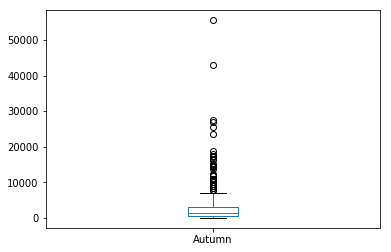

In [43]:
# plot the boxplot of "Autumn" column.
inp0.Autumn.plot.box()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [44]:
# Find the maximum and 99th percentile of Winter season.
max(inp0.Winter)-np.quantile(inp0.Winter,.99)

11402.69999999999

In [45]:
# Find the maximum and 99th percentile of Summer season.
max(inp0.Summer)-np.quantile(inp0.Summer,.99)

21602.999999999996

In [46]:
# Find the maximum and 99th percentile of Spring season.
max(inp0.Spring)-np.quantile(inp0.Spring,.99)

4716.8

In [47]:
# Find the maximum and 99th percentile of Autumn season.
max(inp0.Autumn)-np.quantile(inp0.Autumn,.99)

31397.999999999975

## Bivariate Analysis 

### WHAT IS CORRELATION MATRIX?
One very important concept that has been covered in the video above is that of correlation coefficient. Now, correlation coefficient depicts only a linear relationship between numerical variables. It does not depict any other relationship between variables. A zero correlation does not imply that there is no relation between variables; it merely indicates that there will no linear relationship between them. Also, there can be a negative or positive correlation between variables. A negative correlation means that if the value of one variable increases, the value of another decreases, whereas it is the opposite for a positive correlation.

Now, the higher the coefficient of correlation between numerical variables, the higher the linear relation between them.

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


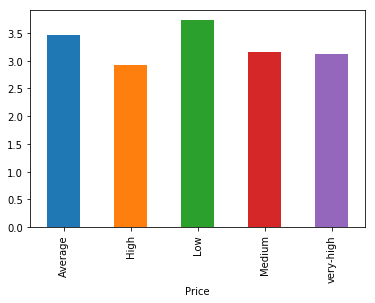

In [48]:
# Find the Mean of Ratings for each Price category.
inp0.groupby('Price').mean().Rating.plot.bar()

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [49]:
# Find the median of Ratings for each Style category.
inp0.groupby('Style').median()

,Dress_ID,Rating,Recommendation,Summer,Autumn,Winter,Spring,Total_Sales
Style,,,,,,,,
Brief,8.712196e+08,4.60,0.0,460.0,1415.0,384.0,107.0,2399.0
Casual,8.911033e+08,4.60,0.0,585.0,1397.0,442.0,132.0,2539.0
Others,1.114583e+09,0.00,0.0,279.5,741.5,240.0,54.5,1315.5
Sexy,9.409186e+08,4.60,0.0,607.0,1635.0,482.0,98.0,2928.0
bohemian,9.110851e+08,4.60,1.0,430.0,1154.0,420.0,71.0,2066.0
cute,8.865011e+08,4.60,1.0,569.0,1587.0,368.0,127.0,2231.0
party,8.282912e+08,4.70,1.0,280.0,686.0,206.5,70.5,1273.5
sexy,9.791085e+08,4.55,0.5,2518.0,5391.5,2279.5,443.0,10627.5
vintage,1.016251e+09,4.60,0.0,1021.0,2152.0,774.0,153.0,4144.0


Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [50]:
# Summer sale vs Recommendation.
inp0.groupby('Recommendation').mean()

,Dress_ID,Rating,Summer,Autumn,Winter,Spring,Total_Sales
Recommendation,,,,,,,
0,9.157669e+08,3.414706,1433.547794,2841.720588,987.654412,298.209559,5561.132353
1,8.843127e+08,3.597487,1469.899497,2868.060302,1002.809045,303.658291,5644.427136


In [51]:
# Spring sale vs Recommendation.


In [52]:
# Autumn sale vs Recommendation.


In [53]:
# Winter sale vs Recommendation.


### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


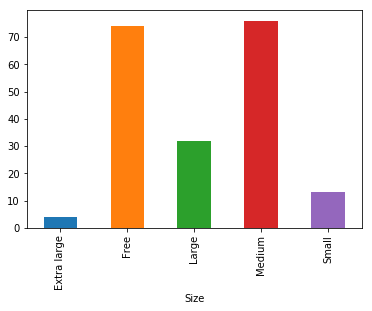

In [54]:
# Size vs Recommendation.
inp0.groupby('Size').sum().Recommendation.plot.bar()

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


In [64]:
# plot the heat map of Style, price and Recommendation.
x=inp0.pivot_table(values='Recommendation',index='Price',columns='Style')
x

Style,Brief,Casual,Others,Sexy,bohemian,cute,party,sexy,vintage,work
Price,,,,,,,,,,
Average,0.333333,0.345455,0.375,0.344828,0.333333,0.400000,0.647059,0.00,0.352941,0.214286
High,NaN,0.666667,NaN,0.000000,NaN,0.666667,0.333333,NaN,0.000000,NaN
Low,0.000000,0.379310,NaN,0.500000,0.666667,0.500000,NaN,0.75,0.250000,0.000000
Medium,NaN,0.666667,0.500,0.000000,1.000000,1.000000,0.800000,0.00,0.500000,0.000000
very-high,NaN,0.500000,NaN,0.000000,1.000000,NaN,0.823529,NaN,NaN,NaN


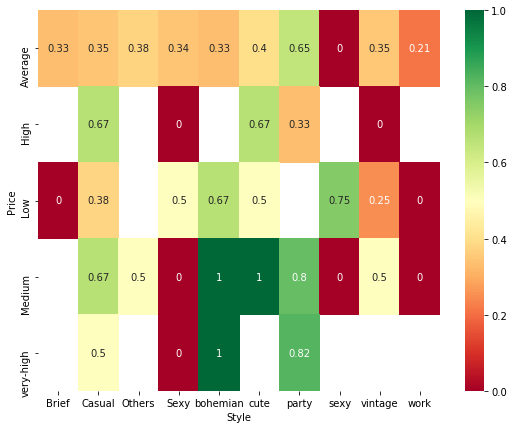

In [61]:
plt.figure(figsize=[9,7])
sns.heatmap(x,cmap='RdYlGn',annot=True)

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


In [67]:
y=inp0.pivot_table(values='Recommendation',index='Season',columns='Material')
y

Material,Missing,Others,chiffonfabric,cotton,microfiber,milksilk,mix,nylon,polyster,rayon,silk
Season,,,,,,,,,,,
Autumn,0.428571,0.000000,0.500,0.294118,NaN,1.0,NaN,0.000000,0.266667,0.666667,0.000000
Spring,0.657143,0.500000,0.600,0.576923,1.0,NaN,0.500000,0.333333,0.571429,1.000000,0.538462
Summer,0.454545,0.142857,0.125,0.383562,0.0,0.0,0.333333,1.000000,0.071429,0.333333,0.000000
Winter,0.481481,0.400000,0.000,0.500000,0.0,0.0,0.200000,0.333333,0.346939,NaN,0.714286


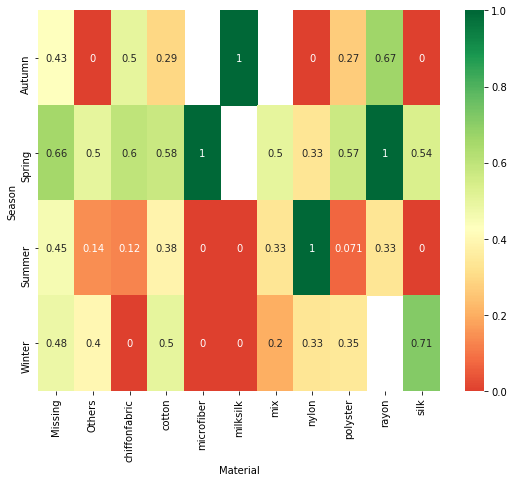

In [70]:
# plot the heat map of Season, material and Recommendation.
plt.figure(figsize=[9,7])
sns.heatmap(y,cmap='RdYlGn',annot=True,center=0.427)